Conversão concluída! Imagens salvas no diretório '/content/output_images'.
binarizada.png	binarizada.ppm	cinza.png  cinza.ppm  entrada.png  entrada.ppm
Exibindo entrada.png


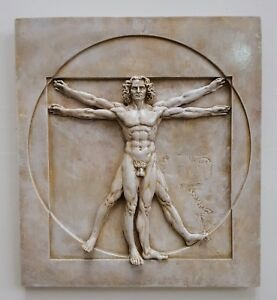

Exibindo cinza.png


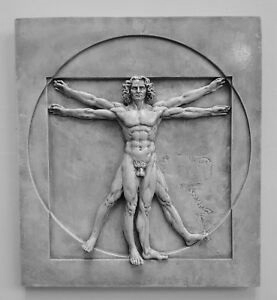

Exibindo binarizada.png


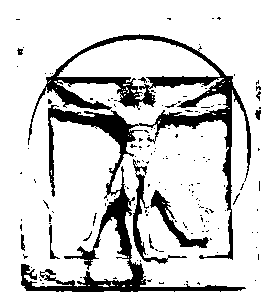

In [17]:
import os

def read_ppm_image(file_path):
    with open(file_path, 'rb') as f:
        header = f.readline().strip()
        if header != b'P6':
            raise ValueError("Formato não suportado. Use imagens no formato PPM (P6).")

        # Lê largura, altura e valor máximo
        dimensions = f.readline().strip()
        while dimensions.startswith(b'#'):
            dimensions = f.readline().strip()
        width, height = map(int, dimensions.split())

        max_val = int(f.readline().strip())
        if max_val != 255:
            raise ValueError("Apenas imagens com valor máximo de 255 são suportadas.")

        # Lê os dados de pixel
        pixels = list(f.read())

    return width, height, pixels

def write_ppm_image(file_path, width, height, pixels):
    with open(file_path, 'wb') as f:
        f.write(b'P6\n')
        f.write(f"{width} {height}\n255\n".encode())
        f.write(bytearray(pixels))

def convert_to_grayscale(width, height, pixels):
    grayscale_pixels = []
    for i in range(0, len(pixels), 3):
        r, g, b = pixels[i], pixels[i+1], pixels[i+2]
        gray = int(0.299 * r + 0.587 * g + 0.114 * b)  # Conversão para cinza
        grayscale_pixels.extend([gray, gray, gray])
    return grayscale_pixels

def binarize_image(width, height, grayscale_pixels, threshold=127):
    binary_pixels = []
    for i in range(0, len(grayscale_pixels), 3):
        gray = grayscale_pixels[i]
        binary_value = 255 if gray > threshold else 0  # Binarização
        binary_pixels.extend([binary_value, binary_value, binary_value])
    return binary_pixels

def save_images_to_directory(output_dir, **images):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for name, (width, height, pixels) in images.items():
        output_path = os.path.join(output_dir, f"{name}.ppm")
        write_ppm_image(output_path, width, height, pixels)

# Exemplo de uso
input_file = "/content/vitruv [MConverter.eu].ppm"
output_directory = "/content/output_images"
gray_output_name = "cinza"
binary_output_name = "binarizada"

# Leitura da imagem
width, height, pixels = read_ppm_image(input_file)

# Conversão para níveis de cinza
gray_pixels = convert_to_grayscale(width, height, pixels)

# Binarização
binary_pixels = binarize_image(width, height, gray_pixels)

# Salvar imagens no diretório especificado
save_images_to_directory(output_directory,
                         entrada=(width, height, pixels),
                         cinza=(width, height, gray_pixels),
                         binarizada=(width, height, binary_pixels))

print(f"Conversão concluída! Imagens salvas no diretório '{output_directory}'.")

# Listar arquivos no diretório
!ls output_images

def write_png_image(file_path, width, height, pixels):
    from PIL import Image
    image = Image.new("RGB", (width, height))
    image.putdata([(pixels[i], pixels[i+1], pixels[i+2]) for i in range(0, len(pixels), 3)])
    image.save(file_path, format="PNG")

def save_images_to_directory(output_dir, **images):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for name, (width, height, pixels) in images.items():
        output_path = os.path.join(output_dir, f"{name}.png")
        write_png_image(output_path, width, height, pixels)

# Atualização para salvar as imagens como PNG
from PIL import Image

save_images_to_directory(output_directory,
                         entrada=(width, height, pixels),
                         cinza=(width, height, gray_pixels),
                         binarizada=(width, height, binary_pixels))

from IPython.display import display
from PIL import Image

# Exibir as imagens convertidas
for image_name in ["entrada", "cinza", "binarizada"]:
    print(f"Exibindo {image_name}.png")
    display(Image.open(f"{output_directory}/{image_name}.png"))



